Compare PCA, Metric MDS and non metric MDS.   
Apply all 3 on the wine dataset (13 dim features)   
Plot the 2D embeddings side by side and compare - which method shows clearer separation of clusters and why..?    
### Stress Function Analysis
For the non metric MDS on the Iris dataset, plot the stress value vs number of dimensions.  
Why does stress decrease as dim increases..?

In [1]:
from sklearn.datasets import load_wine, load_iris

wine_data, wine_target = load_wine(return_X_y=True)
iris_data, iris_target = load_iris(return_X_y=True)

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_data)

mds_metric = MDS(n_components=2, metric=True, random_state=42, normalized_stress='auto')
wine_mds_metric = mds_metric.fit_transform(wine_data)

mds_nonmetric = MDS(n_components=2, metric=False, random_state=42, normalized_stress='auto')
wine_mds_nonmetric = mds_nonmetric.fit_transform(wine_data)

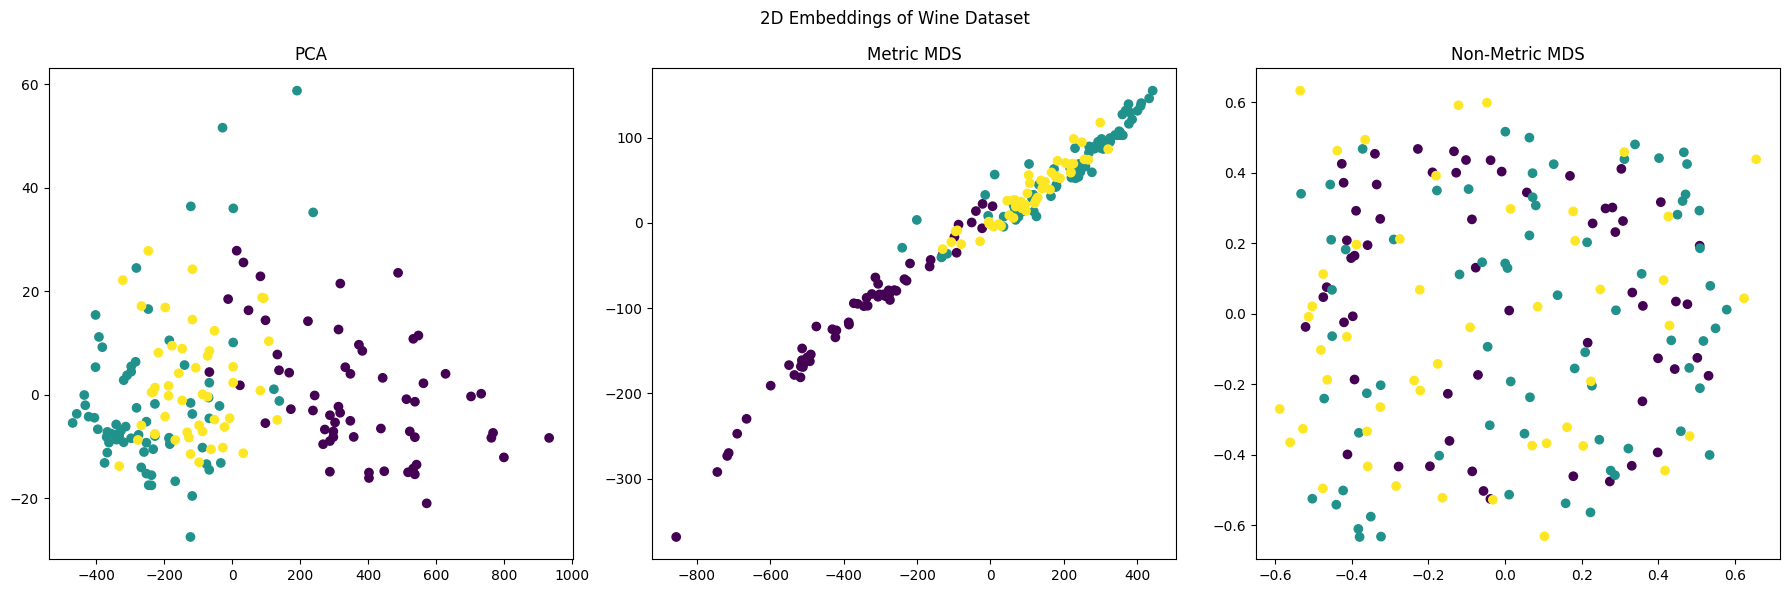

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(wine_pca[:, 0], wine_pca[:, 1], c=wine_target)
axes[0].set_title('PCA')

axes[1].scatter(wine_mds_metric[:, 0], wine_mds_metric[:, 1], c=wine_target)
axes[1].set_title('Metric MDS')

axes[2].scatter(wine_mds_nonmetric[:, 0], wine_mds_nonmetric[:, 1], c=wine_target)
axes[2].set_title('Non-Metric MDS')

fig.suptitle("2D Embeddings of Wine Dataset")
plt.tight_layout()
plt.show()

In [8]:
from sklearn.manifold import MDS
import numpy as np

max_dimensions = iris_data.shape[1]
stress_values = []
dimensions = range(1, max_dimensions + 1)

for n_dim in dimensions:
    mds_nonmetric = MDS(n_components=n_dim, metric=False, random_state=42, normalized_stress='auto')
    mds_nonmetric.fit(iris_data)
    stress_values.append(mds_nonmetric.stress_)

print("Dimensions:", list(dimensions))
print("Stress values:", stress_values)

Dimensions: [1, 2, 3, 4]
Stress values: [np.float64(0.4082231769930733), np.float64(0.29956300216181503), np.float64(0.24114342517939444), np.float64(0.20548345047147326)]


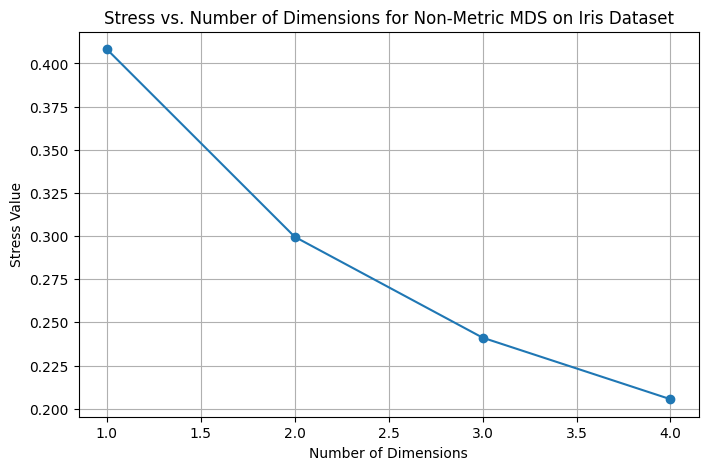

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(dimensions, stress_values, marker='o')
plt.xlabel("Number of Dimensions")
plt.ylabel("Stress Value")
plt.title("Stress vs. Number of Dimensions for Non-Metric MDS on Iris Dataset")
plt.grid(True)
plt.show()